# Cargar un data frame desde un archivo csv.

In [205]:
import pandas as pd

elon_tweets_df = pd.read_csv("Elon_tweets.csv")

# Cargar un data frame distinto desde un archivo Excel.

In [208]:
# Creo un archivo excel(xlsx)
df = pd.DataFrame(
                    [
                        ["fulano", 'Azerbaiyan', 15],
                        ["mengano", "Tayikistán", 150],
                        ["sultano", "Turkmenistan", 35],
                        ["sultano_segundo", "Turkmenistan", 85]
                    ],
                    index=['one', 'two', 'three', 'four'],
                    columns=['presidente', 'pais', 'edad']
            )

df.to_excel('pandas_to_excel.xlsx', sheet_name='new_sheet_name')

excel_df = pd.read_excel('pandas_to_excel.xlsx', index_col=0)
excel_df

,presidente,pais,edad
one,fulano,Azerbaiyan,15
two,mengano,Tayikistán,150
three,sultano,Turkmenistan,35
four,sultano_segundo,Turkmenistan,85


# Mostrar los datos de ambos dataframes.

In [209]:
print(excel_df)
print(elon_tweets_df.head())

            presidente          pais  edad
one             fulano    Azerbaiyan    15
two            mengano    Tayikistán   150
three          sultano  Turkmenistan    35
four   sultano_segundo  Turkmenistan    85
                                              Tweets  Retweets    Likes  Date  \
0                              @PeterSchiff 🤣 thanks       209     7021    10   
1                              @ZubyMusic Absolutely       755    26737    10   
2   Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927   356623    10   
3     Meeting a lot of cool people at Twitter today!      9366   195546    10   
4  Entering Twitter HQ – let that sink in! https:...    145520  1043592    10   

                                   Cleaned_Tweets  
0                                          thanks  
1                                      Absolutely  
2                        Dear Twitter Advertisers  
3  Meeting a lot of cool people at Twitter today!  
4         Entering Twitter HQ – let th

# Realizar las siguientes acciones sobre el segundo dataframe:
##       Group By sobre un campo y utilizando sum()
##       Realizar un Melt

In [213]:
print(excel_df.groupby(by=['pais']).sum(numeric_only= True))

print(excel_df.melt(id_vars=['pais'], value_vars=['presidente', "edad"]))

              edad
pais              
Azerbaiyan      15
Tayikistán     150
Turkmenistan   120
           pais    variable            value
0    Azerbaiyan  presidente           fulano
1    Tayikistán  presidente          mengano
2  Turkmenistan  presidente          sultano
3  Turkmenistan  presidente  sultano_segundo
4    Azerbaiyan        edad               15
5    Tayikistán        edad              150
6  Turkmenistan        edad               35
7  Turkmenistan        edad               85


# Realizar un gráfico de Barras con el primer dataframe.

In [206]:
# Remplazo la fecha de cada tweet por el mes

#elon_tweets_df['Date'] = elon_tweets_df['Date'].map(lambda x: str(x)[5:-12]) - deprecated
elon_tweets_df['Date'] = pd.to_datetime(elon_tweets_df['Date']).dt.month

# Agrupo los tweets por mes
retweets_likes_por_mes = elon_tweets_df.groupby(by= ['Date']).sum(numeric_only= True)
retweets_likes_por_mes

,Retweets,Likes
Date,,
1,389069,3049479
2,676013,6714981
3,1174527,13649637
4,4672954,52523236
5,3325579,40444157
6,1076176,14801450
7,992448,15126007
8,899965,11724174
9,511909,7207478


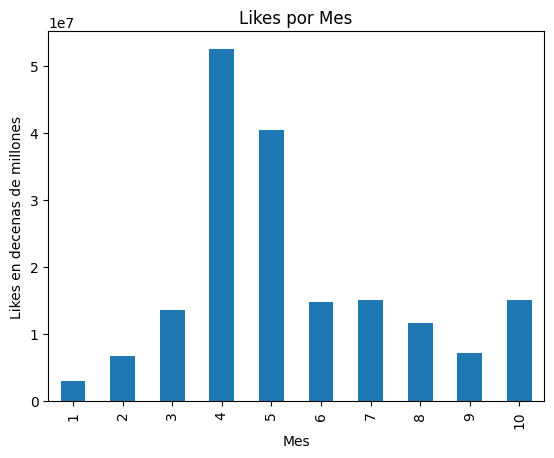

In [204]:
# Se grafican los likes de Elon por mes
import matplotlib.pyplot as plt

date_likes_df = retweets_likes_por_mes['Likes']
date_likes_df.plot(y='Likes', kind='bar')
plt.xlabel('Mes')
plt.ylabel('Likes en decenas de millones')
plt.title('Likes por Mes')
plt.show()